# Final Project
## Dataset:
https://archive.ics.uci.edu/ml/datasets/adult  
Classifying: >50K, <=50K.  

**age:** continuous.  
**workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  
**fnlwgt:** continuous.  
**education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  
**education-num:** continuous.  
**marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  
**occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.  
**relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.  
**race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  
**sex:** Female, Male.  
**capital-gain:** continuous.  
**capital-loss:** continuous.  
**hours-per-week:** continuous.  
**native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import *
from scipy import stats

In [2]:
data = pd.read_csv("adult.csv")
display(data.head())
np.shape(data)[0]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


48842

## Data Cleaning

In [3]:
old_data_types = data.dtypes
data.columns = data.columns.str.strip()
data = data.apply(lambda x : x.astype(str).str.strip(' .') if not pd.api.types.is_int64_dtype(x) else x)

In [4]:
value_instances = data.apply(lambda x : dict(x.value_counts()))

In [5]:
print(value_instances['marital-status'])
print(value_instances['relationship'])

{'Married-civ-spouse': 22379, 'Never-married': 16117, 'Divorced': 6633, 'Separated': 1530, 'Widowed': 1518, 'Married-spouse-absent': 628, 'Married-AF-spouse': 37}
{'Husband': 19716, 'Not-in-family': 12583, 'Own-child': 7581, 'Unmarried': 5125, 'Wife': 2331, 'Other-relative': 1506}


In [6]:
# Count number of instances of missing values
data.loc[:, (data == '?').any()].apply(lambda x : x.value_counts()).head()

,workclass,occupation,native-country
?,2799.0,2809.0,857.0
Adm-clerical,NaN,5611.0,NaN
Armed-Forces,NaN,15.0,NaN
Cambodia,NaN,NaN,28.0
Canada,NaN,NaN,182.0


In [7]:
# drop rows with missing values
data = data.replace('?', np.nan).dropna()
display(data.head())
np.shape(data)[0]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


45222

### Pruning Redundant Data via Correlation Analysis
Features of interest:
* `education` and `education-num`
* `marital-status` and `relationship`

In [8]:
xtrain_edu, xtest_edu, ytrain_edu, ytest_edu = model_selection.train_test_split(np.array(data['education-num']), 
                                                                                 np.array(data['education']),
                                                                                 test_size=0.2,
                                                                                 random_state=0)

In [9]:
# https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365
clf_edu = linear_model.LogisticRegression(solver='newton-cg').fit(xtrain_edu.reshape(-1, 1), ytrain_edu)

In [10]:
predict_edu = clf_edu.predict(xtest_edu.reshape(-1, 1))
print(f"Test: {predict_edu}\nPrediction: {ytest_edu}\n")
print(f"Accuracy: {metrics.accuracy_score(ytest_edu, predict_edu)}")

Test: ['Assoc-acdm' 'HS-grad' 'Some-college' ... 'HS-grad' 'Some-college'
 'Bachelors']
Prediction: ['Assoc-acdm' 'HS-grad' 'Some-college' ... 'HS-grad' 'Some-college'
 'Bachelors']

Accuracy: 1.0


**Logistic Regression for Pruning**
* We are trying to determine if `education` and `education-num` are actually correlated and if we can prune one of them from the dataset. Although based on column names, it's highly likely they are related, we wish to confirm this with correlation analysis. 
* Since `education` is categorical and `education-num` is continuous, we cannot perform Pearson's Correlation or Chi2. Instead, we can utilize *Logistic Regression* to see if the two features are correlated. The `newton-cg` sovler is used as it's the one that best matches our dataset given our sample size and values. We will train this model with `education-num` to classify they're `education`. We'll train it on 80% of the data and test it with the remaining 20%. If the resulting `accuracy` is extremely high, we can conclude that **`education` and `education-num` are correlated** and we can prune one of them.

*Result:*  
* Accuracy: `1.0`
* Given that the model was able to predict the test set's `education` with 100% accuracy, we can confirm that `education` and `education-num` are correlated and will be pruning one of the features.

In [11]:
display(pd.crosstab(data['marital-status'], data['relationship']))
chi2_mr, p_mr, df_mr, expected_mr = stats.chi2_contingency(pd.crosstab(data['marital-status'], data['relationship']))
print(f"Chi2 Value: {chi2_mr}")

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
marital-status,,,,,,
Divorced,0,3435,166,429,2267,0
Married-AF-spouse,11,0,1,1,0,19
Married-civ-spouse,18655,19,184,125,0,2072
Married-spouse-absent,0,282,44,57,169,0
Never-married,0,6691,820,5864,1223,0
Separated,0,588,75,130,618,0
Widowed,0,687,59,20,511,0


Chi2 Value: 53655.73391361823


**Chi Square for Pruning**  
* Null Hypothesis: `marital-status` and `relationship` are not correlated
* Significance Level: `0.05`
* DoF: (7-1)(6-1) = `30`
* Critical Value: `43.77`  

*Result:*  
* Chi2 Value: `58195.24158415406`
* In order to fail to reject the null hypothesis, we need our Chi2 Value to be less than `43.77`. However, after performing Chi2 analysis, we get `58195.24158415406`, which is much larger than the `43.77`. This means that we **reject our null hypothesis** that `marital-status` and `relationship` are most definitely correlated, and we can prune one of the features.

In [12]:
# dropping redundant features
data = data.drop(columns=['education', 'relationship'])

In [13]:
data

,age,workclass,fnlwgt,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,13,Never-married,Prof-specialty,White,Male,0,0,40,United-States,<=50K
48837,39,Private,215419,13,Divorced,Prof-specialty,White,Female,0,0,36,United-States,<=50K
48839,38,Private,374983,13,Married-civ-spouse,Prof-specialty,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,13,Divorced,Adm-clerical,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## Feature Selection

In [23]:
# Split data between categorical and numerical data
cat_data = data.loc[:, data.dtypes != 'int64']
num_data = data.drop(columns=cat_data.columns)
display(cat_data.head())
display(num_data.head())

,workclass,marital-status,occupation,race,sex,native-country,income
0,State-gov,Never-married,Adm-clerical,White,Male,United-States,<=50K
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,White,Male,United-States,<=50K
2,Private,Divorced,Handlers-cleaners,White,Male,United-States,<=50K
3,Private,Married-civ-spouse,Handlers-cleaners,Black,Male,United-States,<=50K
4,Private,Married-civ-spouse,Prof-specialty,Black,Female,Cuba,<=50K


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


**Numerical Data**

In [25]:
con_data.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.075792,0.037623,0.079683,0.059351,0.101992
fnlwgt,-0.075792,1.000000,-0.041993,-0.004110,-0.004349,-0.018679
education-num,0.037623,-0.041993,1.000000,0.126907,0.081711,0.146206
capital-gain,0.079683,-0.004110,0.126907,1.000000,-0.032102,0.083880
capital-loss,0.059351,-0.004349,0.081711,-0.032102,1.000000,0.054195
hours-per-week,0.101992,-0.018679,0.146206,0.083880,0.054195,1.000000


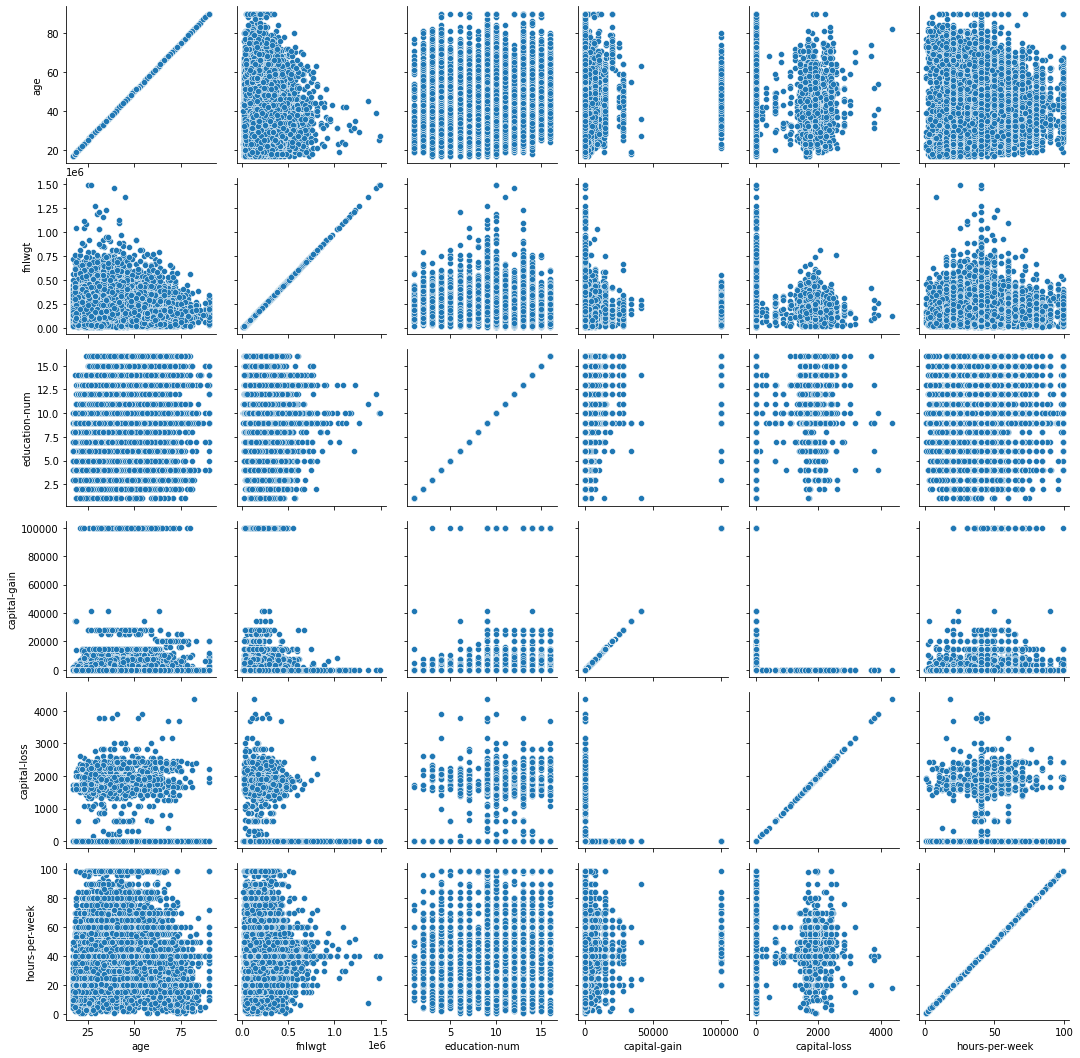

In [22]:
fs_pgplot = sns.PairGrid(data)
fs_pgplot.map(sns.scatterplot)

**Categorical Data**